In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = r"../dados/Petroleo cru - WTI e Brent e derivados_data-diario_EIA - Original.xls"

In [3]:
excel_file = pd.ExcelFile(file)

In [4]:
pd.read_excel(excel_file, sheet_name="Data 7", header=2, index_col=0).shape

(7853, 1)

In [5]:
# read data into single dataframe
df = pd.DataFrame()
df["crude_oil"] = pd.read_excel(excel_file, sheet_name="Data 1", header=2, index_col=0).iloc[:, 0] / 42
df["conventional_gas"] = pd.read_excel(excel_file, sheet_name="Data 2", header=2, index_col=0).iloc[:, 0]
df["conventional_gas2"] = pd.read_excel(excel_file, sheet_name="Data 2", header=2, index_col=0).iloc[:, 1]
df["rbob_regular_gas"] = pd.read_excel(excel_file, sheet_name="Data 3", header=2, index_col=0).iloc[:, 0]
df["heating_oil"] = pd.read_excel(excel_file, sheet_name="Data 4", header=2, index_col=0).iloc[:, 0]
df["diesel_fuel"] = pd.read_excel(excel_file, sheet_name="Data 5", header=2, index_col=0).iloc[:, 0]
df["diesel_fuel2"] = pd.read_excel(excel_file, sheet_name="Data 5", header=2, index_col=0).iloc[:, 1]
df["diesel_fuel3"] = pd.read_excel(excel_file, sheet_name="Data 5", header=2, index_col=0).iloc[:, 2]
df["jet_fuel"] = pd.read_excel(excel_file, sheet_name="Data 6", header=2, index_col=0).iloc[:, 0]
df["propane"] = pd.read_excel(excel_file, sheet_name="Data 7", header=2, index_col=0).iloc[:, 0]

In [6]:
# aggregate monthly
df["month_date"] = pd.Series(df.index).apply(lambda dt: dt.replace(day=1)).values
month_df = df.groupby("month_date").mean()
# month_df.dropna(inplace=True)
month_df.shape

(454, 10)

In [7]:
month_df.head()

,crude_oil,conventional_gas,conventional_gas2,rbob_regular_gas,heating_oil,diesel_fuel,diesel_fuel2,diesel_fuel3,jet_fuel,propane
month_date,,,,,,,,,,
1986-01-01,0.545844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-02-01,0.367970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-01,0.300298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-04-01,0.305801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-05-01,0.366134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
month_df.isna().mean().sort_values().head(8)

crude_oil            0.000000
conventional_gas     0.011013
conventional_gas2    0.011013
heating_oil          0.011013
jet_fuel             0.112335
propane              0.171806
diesel_fuel3         0.270925
rbob_regular_gas     0.453744
dtype: float64

In [9]:
month_df = month_df[[
    'crude_oil', 'conventional_gas', 'heating_oil', 'jet_fuel', 'diesel_fuel3'
]].dropna()

In [10]:
# first and last month
month_df.index[[0, -1]]

DatetimeIndex(['1996-04-01', '2023-10-01'], dtype='datetime64[ns]', name='month_date', freq=None)

In [11]:
# validation that we have all months between first and last
(month_df.index == pd.date_range(month_df.index[0], month_df.index[-1], freq="MS")).mean()

1.0

In [64]:
# compute spreads (monthly)
month_df["spread1"] = np.log(month_df["conventional_gas"] / month_df["crude_oil"])
month_df["spread2"] = np.log(month_df["heating_oil"] / month_df["crude_oil"])
month_df["spread3"] = np.log(month_df["diesel_fuel3"] / month_df["crude_oil"])
month_df["spread4"] = np.log(month_df["jet_fuel"] / month_df["crude_oil"])

<Axes: xlabel='month_date'>

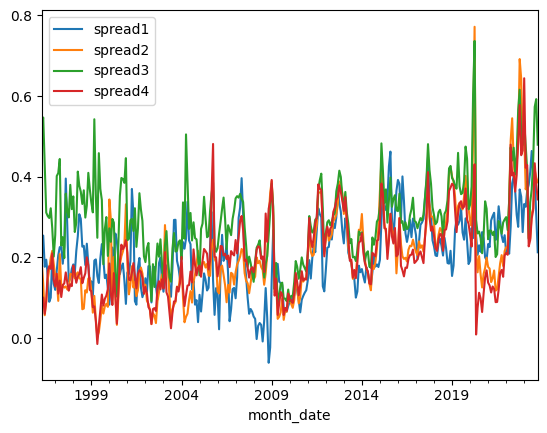

In [65]:
# plot spreads
month_df[["spread1", "spread2", "spread3", "spread4"]].dropna().plot()

In [66]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

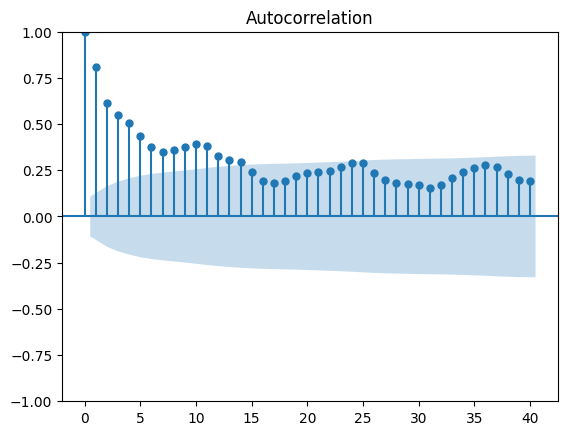

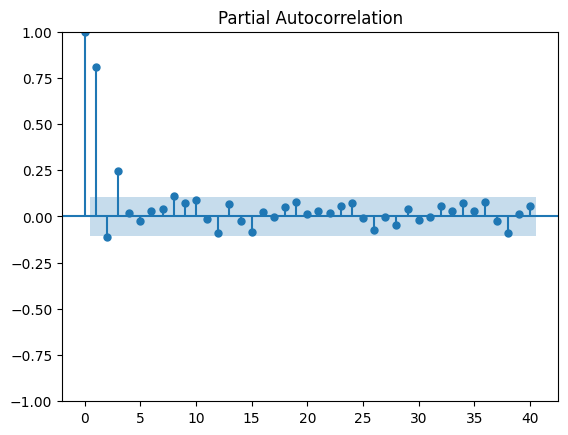

In [67]:
plot_acf( month_df.spread1.dropna(), lags=40);
plot_pacf(month_df.spread1.dropna(), lags=40);

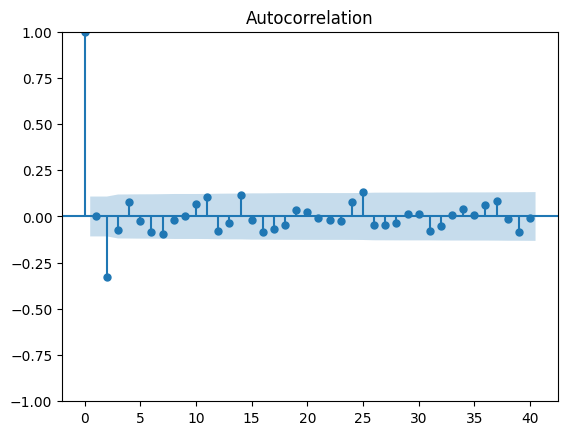

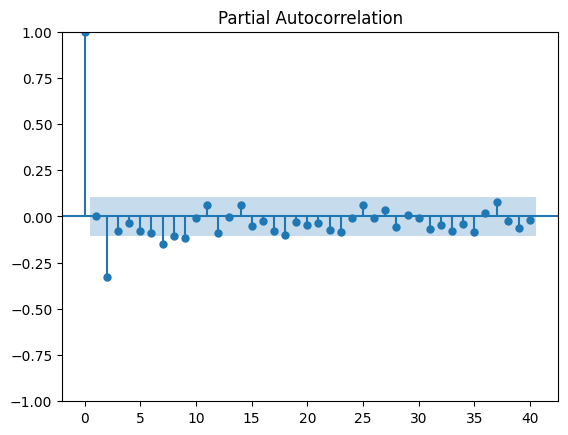

In [68]:
plot_acf( month_df.spread1.diff().dropna(), lags=40);
plot_pacf(month_df.spread1.diff().dropna(), lags=40);

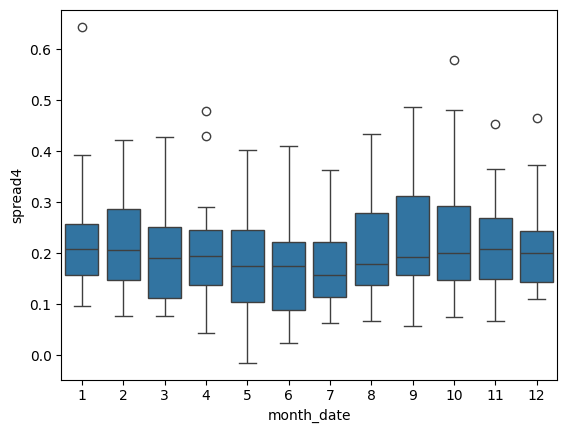

In [72]:
sns.boxplot(x=month_df.index.month, y=month_df.spread4);

In [73]:
month_df.to_csv(r"..//dados//monthly_data.csv")